In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../DataEng/datalake/silver/data.csv')
df

,targetAmount,raisedAmount,supporters,targetDate,datetime
0,500000.0,6355733.0,6042,2023-11-10,2023-10-29 16:16:04
1,500000.0,6231360.0,5908,2023-11-10,2023-10-28 12:49:04
2,500000.0,6226854.0,5900,2023-11-10,2023-10-28 11:50:04
3,500000.0,6101349.0,5757,2023-11-10,2023-10-26 16:26:07
4,500000.0,6196224.0,5868,2023-11-10,2023-10-27 22:36:04
...,...,...,...,...,...
19147,500000.0,6273425.0,5950,2023-11-10,2023-10-28 21:34:05
19148,500000.0,5926796.0,5600,2023-11-10,2023-10-23 13:12:04
19149,500000.0,5657079.0,5304,2023-11-10,2023-10-14 19:00:04
19150,500000.0,5870311.0,5540,2023-11-10,2023-10-20 22:04:04


In [3]:
#order by raisedAmount
df.sort_values(by=['raisedAmount'], inplace=True, ascending=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19152 entries, 10326 to 5839
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   targetAmount  19152 non-null  float64
 1   raisedAmount  19152 non-null  float64
 2   supporters    19152 non-null  int64  
 3   targetDate    19152 non-null  object 
 4   datetime      19152 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 897.8+ KB


In [5]:
#change columns datetime to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
df['targetDate'] = pd.to_datetime(df['targetDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19152 entries, 10326 to 5839
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   targetAmount  19152 non-null  float64       
 1   raisedAmount  19152 non-null  float64       
 2   supporters    19152 non-null  int64         
 3   targetDate    19152 non-null  datetime64[ns]
 4   datetime      19152 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 897.8 KB


In [7]:
df.head()

,targetAmount,raisedAmount,supporters,targetDate,datetime
10326,500000.0,6505579.0,6226,2023-11-10,2023-10-30 23:16:05
18732,500000.0,6505579.0,6226,2023-11-10,2023-10-30 23:15:05
10910,500000.0,6505579.0,6226,2023-11-10,2023-10-30 23:14:05
1380,500000.0,6505260.0,6226,2023-11-10,2023-10-30 23:13:05
4489,500000.0,6504882.0,6226,2023-11-10,2023-10-30 23:04:06


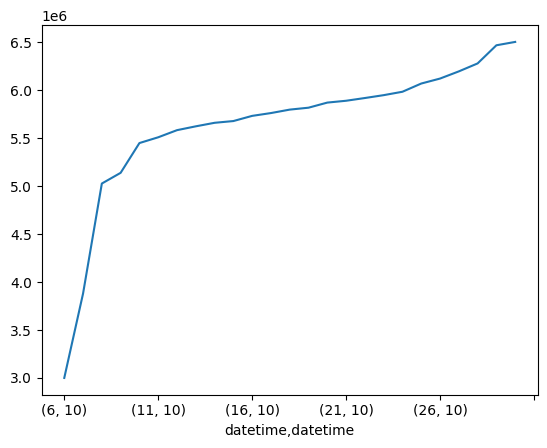

In [8]:
#group by day and month on datetime and get max value on raisedAmount
df.groupby([df['datetime'].dt.day, df['datetime'].dt.month])['raisedAmount'].max().plot()
#save data to csv resume to the of the day
df.groupby([df['datetime'].dt.day, df['datetime'].dt.month])['raisedAmount'].max().to_csv('../../DataEng/datalake/silver/data_resume.csv')

# Agrupando dados

In [9]:
df_groupby_datetime = df.groupby([df['datetime'].dt.day, df['datetime'].dt.month])['raisedAmount'].max()

In [ ]:
df_groupby_datetime.shape

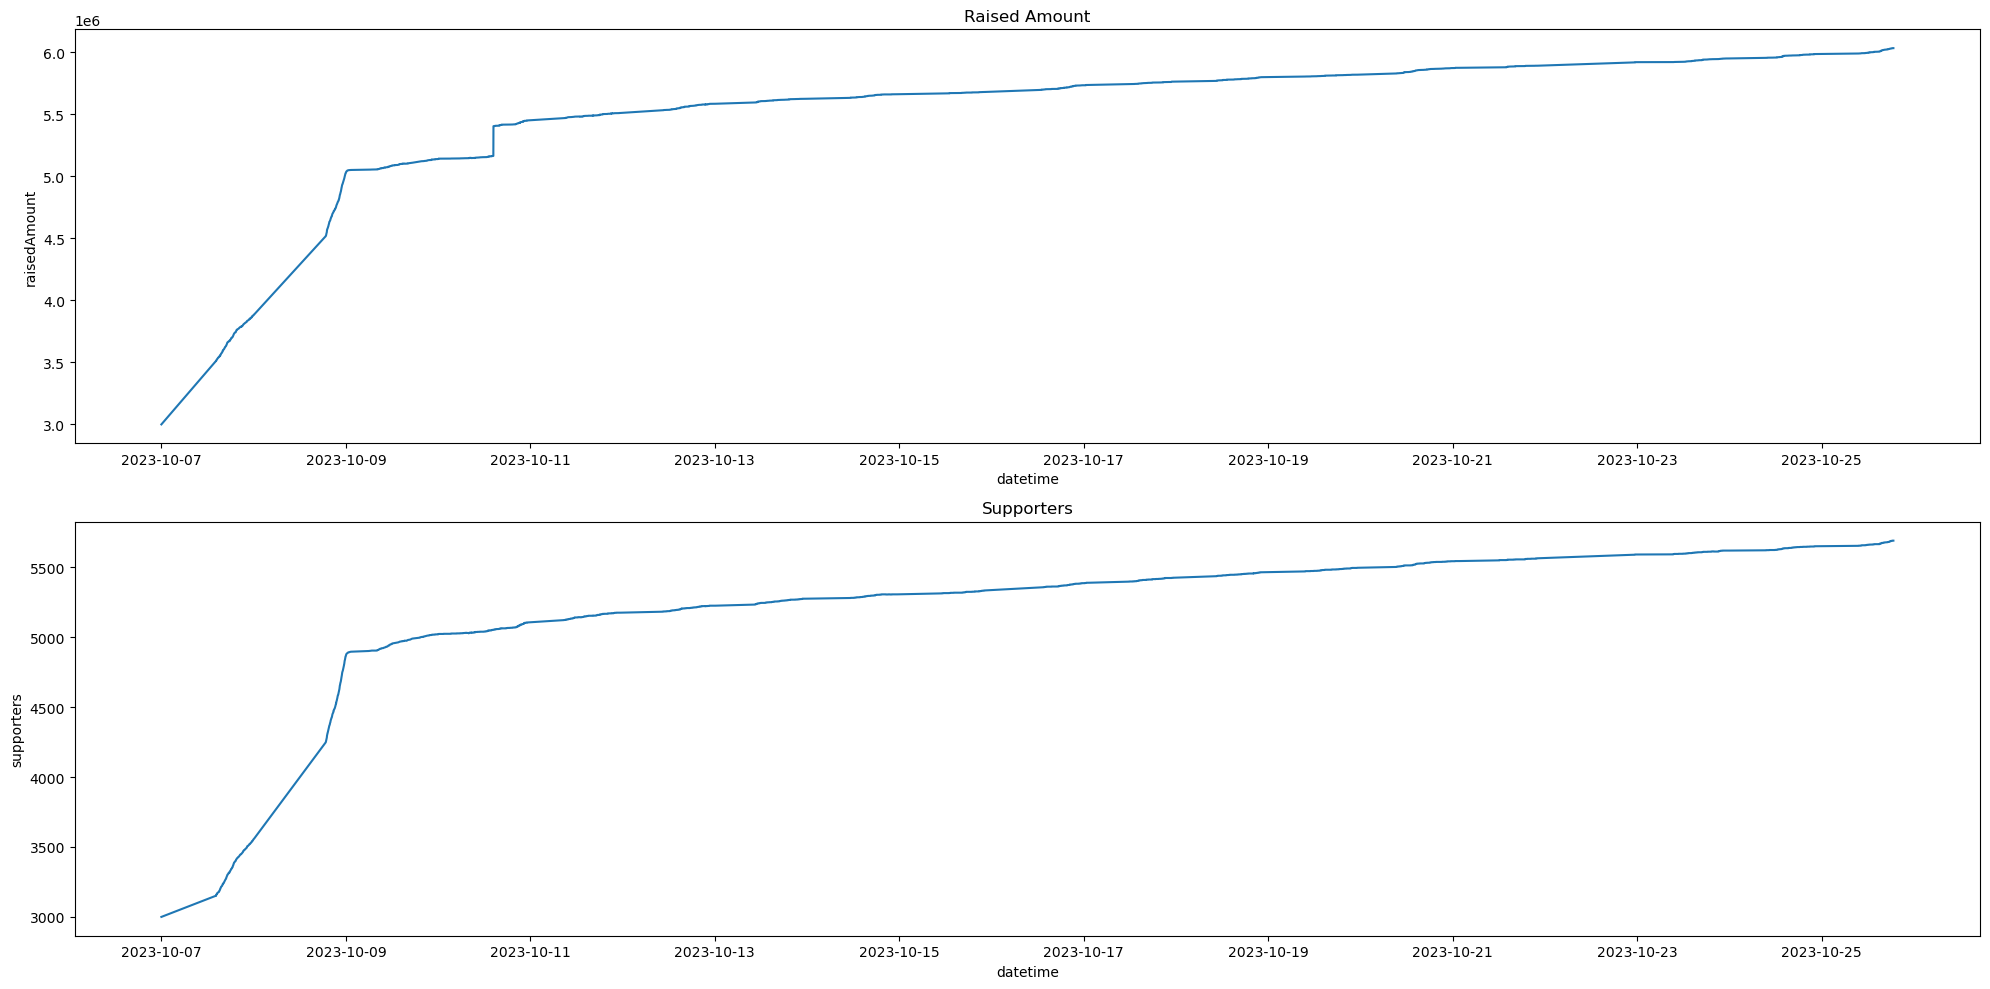

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 10))

# Create a subplot with 2 rows and 1 column
plt.subplot(2, 1, 1)
sns.lineplot(x="datetime", y="raisedAmount", data=df)
# plt.ticklabel_format(style='plain', axis='y')
plt.title("Raised Amount")

plt.subplot(2, 1, 2)
sns.lineplot(x="datetime", y="supporters", data=df)
plt.title("Supporters")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


In [10]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Create subplots with 2 rows and 1 column
fig = sp.make_subplots(rows=2, cols=1)

# Add a trace for "Raised Amount"
trace1 = go.Scatter(x=df["datetime"], y=df["raisedAmount"], mode="lines", name="Raised Amount")

# Add a trace for "Supporters"
trace2 = go.Scatter(x=df["datetime"], y=df["supporters"], mode="lines", name="Supporters")

# Add traces to the subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

# Update layout
fig.update_layout(title="Raised Amount and Supporters", showlegend=True)

# Show the interactive plot
fig.show()


In [11]:
#filter the data to only after 09/10/2023
df[df['datetime'] > '2023-10-09']
#save the data to csv data_after_stabilize.csv
df[df['datetime'] > '2023-10-09'].to_csv('../../DataEng/datalake/silver/data_after_stabilize.csv', index=False)

In [12]:
df.head()

,targetAmount,raisedAmount,supporters,targetDate,datetime
4970,500000.0,6033231.0,5690,2023-11-10,2023-10-25 18:39:05
12608,500000.0,6033231.0,5690,2023-11-10,2023-10-25 18:41:04
1680,500000.0,6033231.0,5690,2023-11-10,2023-10-25 18:30:05
5754,500000.0,6033231.0,5690,2023-11-10,2023-10-25 18:27:05
13145,500000.0,6033231.0,5690,2023-11-10,2023-10-25 18:38:05


Patrick - 27/10/23

**Outros Insights?**
- variação de raisedAmount em relação ao targetAmonut

In [13]:
df['pct_raised_on_target(%)'] = (df['raisedAmount'] / df['targetAmount']) * 100
df['pct_raised_on_target(%)'] = round(df['pct_raised_on_target(%)'], 1)

In [14]:
pct_raised_df = df.groupby('datetime')['pct_raised_on_target(%)'].max().reset_index()

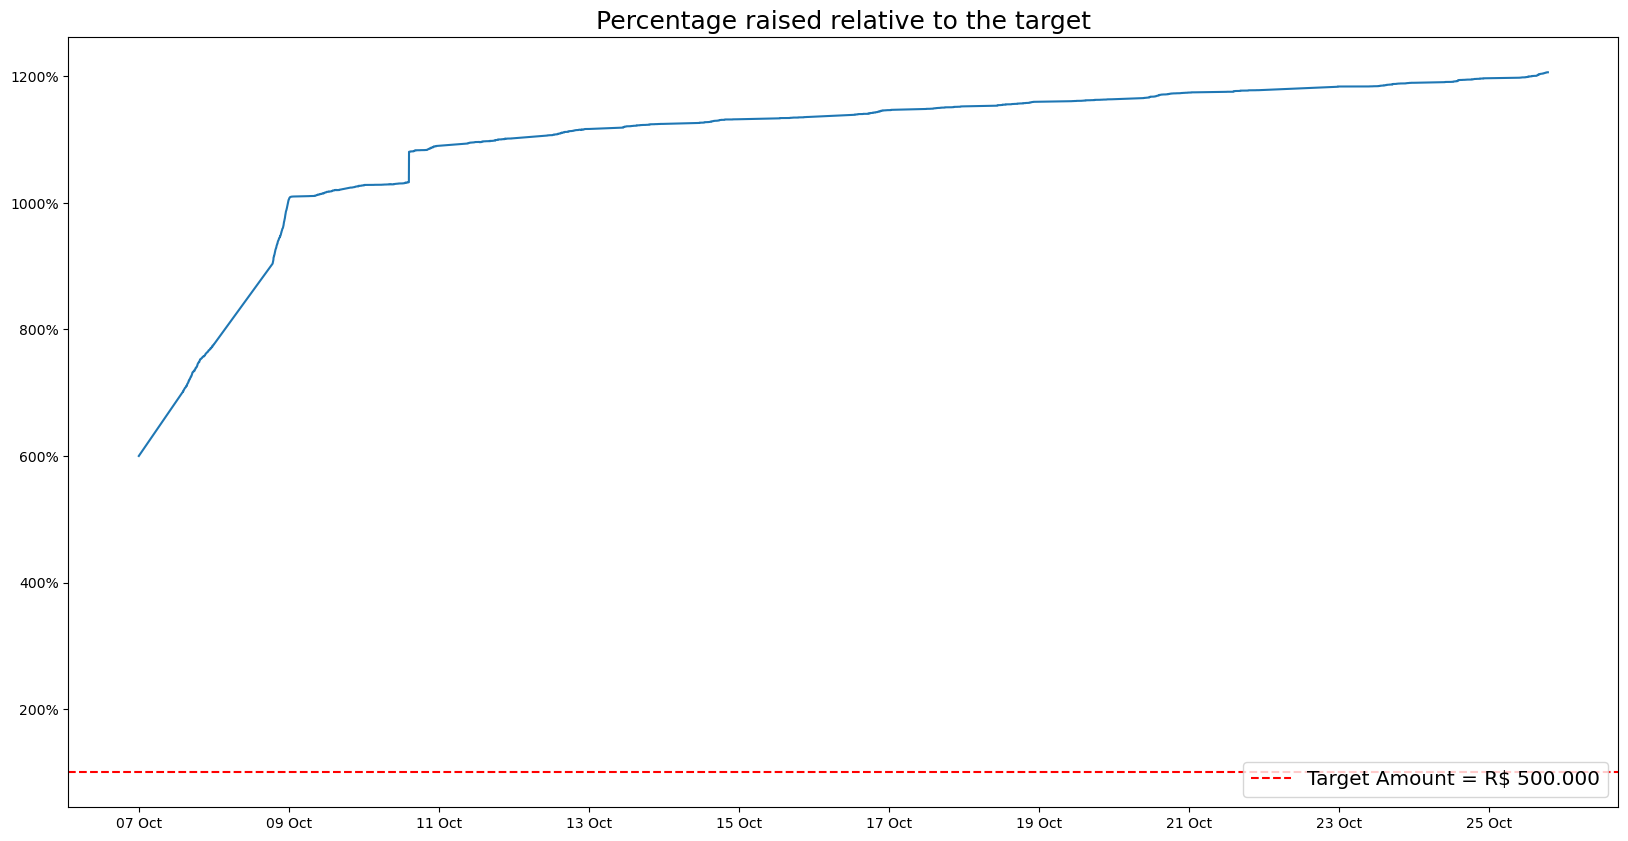

In [64]:
import matplotlib.ticker as mtick 
import matplotlib.dates as mdates

# creating a figure
fig, ax = plt.subplots(figsize=(20, 10))

# Ploting the line plot
ax.plot(pct_raised_df['datetime'], pct_raised_df['pct_raised_on_target(%)']/100)

# Adding a reference line on y-axis
valor_referencia = 1
plt.axhline(y=valor_referencia, color='r', linestyle='--', label='Target Amount = R$ 500.000')

# Set the display format to percentage for the y-axis
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

# Set the display format to days and months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

plt.legend(loc='lower right', fontsize='x-large')

plt.title("Percentage raised relative to the target", fontsize=18)
plt.show()